In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [223]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Final_Proj/CSV_Files/cleaned_df2.csv')

In [225]:
df.head()

,Unnamed: 0,Coupon,Yield,Moody's Rating,Names,Ticker,Weight (%),Price,Shares,Market Value,Notional Value,Sector,Exchange,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,0,3.250,3.580000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,1858.0
1,1,4.000,3.440000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,9740.0
2,2,6.450,2.411028,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3,3.625,2.130000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,1736.0
4,4,2.875,2.480000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,2435.0


In [226]:
rating_dict = {
    
 'Aaa':0,
 'Aa1':1,   
 'Aa2':2,   
 'Aa3':3, 
 'A1':4,
 'A2':5,    
 'A3':6,
 'Baa1':7,
 'Baa2':8,
 'Baa3':9,
 'Ba1':10,
 'Ba2':11,
 'Ba3':12,
 'B2':13,
 'Caa1':14,
 'WR':15,
    
    }


In [227]:
df["Moody's Rating"] = df["Moody's Rating"].replace(rating_dict)

In [228]:
cols_drop = ['Unnamed: 0', 'Sector', 'Exchange']

In [229]:
df.drop(columns=cols_drop, inplace=True)

In [230]:
pd.set_option("display.max_columns", 40)

In [231]:
df

,Coupon,Yield,Moody's Rating,Names,Ticker,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,6,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,6,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,6,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,6,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,6,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,7,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,7,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,7,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,7,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [232]:
df.isna().sum()

Coupon                            0
Yield                             0
Moody's Rating                    0
Names                             0
Ticker                            0
Weight (%)                        0
Price                             0
Shares                            0
Market Value                      0
Notional Value                    0
Market Cap (intraday) 5           0
Trailing P/E                      0
Forward P/E 1                     0
PEG Ratio (5 yr expected) 1       0
Price/Sales (ttm)                 0
Price/Book (mrq)                  0
Beta (5Y Monthly)                 0
% Held by Insiders 1              0
% Held by Institutions 1          0
Avg Vol (10 day) 3                0
Avg Vol (3 month) 3               0
Shares Outstanding 5              0
Profit Margin                     0
Operating Margin (ttm)            0
Return on Assets (ttm)            0
Revenue Per Share (ttm)           0
Quarterly Revenue Growth (yoy)    0
Total Cash Per Share (mrq)  

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 31 columns):
Coupon                            1838 non-null float64
Yield                             1838 non-null float64
Moody's Rating                    1838 non-null int64
Names                             1838 non-null object
Ticker                            1838 non-null object
Weight (%)                        1838 non-null float64
Price                             1838 non-null float64
Shares                            1838 non-null float64
Market Value                      1838 non-null float64
Notional Value                    1838 non-null float64
Market Cap (intraday) 5           1838 non-null float64
Trailing P/E                      1838 non-null float64
Forward P/E 1                     1838 non-null float64
PEG Ratio (5 yr expected) 1       1838 non-null float64
Price/Sales (ttm)                 1838 non-null float64
Price/Book (mrq)                  1838 non-null float64
B

In [234]:
df.loc[df["Moody's Rating"] == 1]

,Coupon,Yield,Moody's Rating,Names,Ticker,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
157,2.0000,1.72,1,apple inc,AAPL,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,82.0
158,2.9000,2.27,1,apple inc,AAPL,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,2767.0
159,3.7500,3.14,1,apple inc,AAPL,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,10134.0
160,3.8500,3.13,1,apple inc,AAPL,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,8480.0
161,2.8500,1.64,1,apple inc,AAPL,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,447.0
162,4.4500,3.16,1,apple inc,AAPL,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,8848.0
163,2.4000,1.86,1,apple inc,AAPL,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,1064.0
165,2.2046,2.93,1,apple inc,AAPL,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,82.0
166,2.2500,1.62,1,apple inc,AAPL,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,375.0
167,3.2500,2.15,1,apple inc,AAPL,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,2201.0


In [235]:
df["Moody's Rating"].value_counts()

7     425
6     316
8     268
5     207
15    143
4     135
9     111
0      75
2      46
1      37
10     35
12     17
13     10
3       9
11      3
14      1
Name: Moody's Rating, dtype: int64

## Separating DataFrames to OHE

In [236]:
names_ = ["Names", "Ticker"]

In [237]:
names_df = df[names_]

In [31]:
# names_df.to_csv('names_df.csv')

In [238]:
df = df.drop(columns=names_)

In [239]:
df.head()

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,2435.0


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 29 columns):
Coupon                            1838 non-null float64
Yield                             1838 non-null float64
Moody's Rating                    1838 non-null int64
Weight (%)                        1838 non-null float64
Price                             1838 non-null float64
Shares                            1838 non-null float64
Market Value                      1838 non-null float64
Notional Value                    1838 non-null float64
Market Cap (intraday) 5           1838 non-null float64
Trailing P/E                      1838 non-null float64
Forward P/E 1                     1838 non-null float64
PEG Ratio (5 yr expected) 1       1838 non-null float64
Price/Sales (ttm)                 1838 non-null float64
Price/Book (mrq)                  1838 non-null float64
Beta (5Y Monthly)                 1838 non-null float64
% Held by Insiders 1              1838 non-null float64

In [241]:
df.loc[df["Moody's Rating"] == 1]

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
157,2.0000,1.72,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,82.0
158,2.9000,2.27,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,2767.0
159,3.7500,3.14,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,10134.0
160,3.8500,3.13,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,8480.0
161,2.8500,1.64,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,447.0
162,4.4500,3.16,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,8848.0
163,2.4000,1.86,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,1064.0
165,2.2046,2.93,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,82.0
166,2.2500,1.62,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,375.0
167,3.2500,2.15,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,2201.0


In [242]:
df

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [243]:
df["Moody's Rating"].value_counts()

7     425
6     316
8     268
5     207
15    143
4     135
9     111
0      75
2      46
1      37
10     35
12     17
13     10
3       9
11      3
14      1
Name: Moody's Rating, dtype: int64

In [244]:
df = df.loc[df["Moody's Rating"] != 11]
df = df.loc[df["Moody's Rating"] != 14]

In [245]:
df

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [246]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

y = df["Moody's Rating"]
X = df.drop("Moody's Rating", axis=1)
  
# 
# X -> features, y -> label 
# X = df.data 
# y = df.target 
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

0.23311546840958605


In [247]:
cm

array([[ 4,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0, 13,  0,  7,  2, 13,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 24,  8,  0,  9,  6,  0,  0,  0,  0],
       [ 0,  0,  3,  0, 11,  3, 12,  7, 20, 22,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 12, 17,  0, 13, 51,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  1,  6,  0, 21, 35,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 23,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  2,  2,  0,  3,  6,  6,  1, 14, 15,  0,  0,  0,  0]])

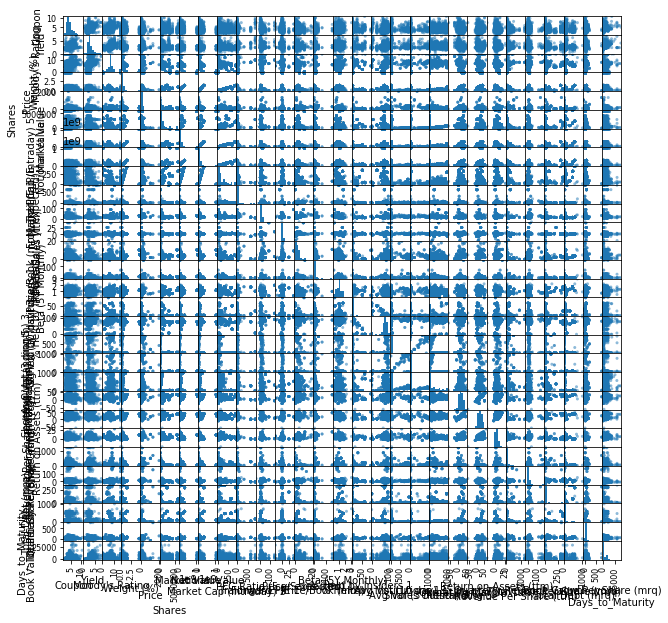

In [195]:
pd.plotting.scatter_matrix(df, figsize=(10,10)); 

In [248]:
df["Moody's Rating"].value_counts() 

7     425
6     316
8     268
5     207
15    143
4     135
9     111
0      75
2      46
1      37
10     35
12     17
13     10
3       9
Name: Moody's Rating, dtype: int64

In [249]:
y = df["Moody's Rating"]
X = df.drop("Moody's Rating", axis=1)
X.head()

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,2435.0


In [250]:
X

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [251]:
# Perform a train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [252]:
# Calculate the mean and standard deviation for each feature within each class for the training set
train = pd.concat([X_train, y_train], axis=1)
aggs = train.groupby("Moody's Rating").agg(['mean', 'std'])
aggs

Coupon               Yield           Weight (%)            \
                    mean       std      mean       std       mean       std   
Moody's Rating                                                                
0               3.560947  1.317380  2.400050  0.585431   2.721935  1.733886   
1               3.120489  0.778793  2.334074  0.579458   4.620000  0.000000   
2               3.633969  1.364561  2.275335  0.504127   0.576667  0.066933   
3               3.035714  0.766194  2.021575  0.282514   0.247143  0.095519   
4               3.335947  0.954435  2.377981  0.566856   0.433093  0.231608   
5               3.739962  1.124797  2.552413  0.683704   0.701646  0.475812   
6               4.298223  1.504288  2.686303  0.686079   0.398140  0.319310   
7               4.266241  1.351493  2.815599  0.734840   0.273754  0.238427   
8               4.262176  1.092555  3.006731  0.862733   0.205888  0.157832   
9               4.336712  1.446070  3.059454  0.834136   0.110921  0.051825   
10              6.493429  1.704187  4.435110  1.368322   0.081071  0.023935   
12              5.708333  1.020157  3.181752  0.889146   0.291667  0.230763   
13              6.808333  0.782923  4.686781  1.800608   0.050000  0.000000   
15              3.485329  1.144378  3.093744  0.983022   0.473084  0.954374   

                     Price                    Shares                \
                      mean         std          mean           std   
Moody's Rating                                                       
0               145.523548   50.570176  4.051249e+06  1.629142e+06   
1               324.950000    0.000000  3.327521e+06  0.000000e+00   
2               115.286667    3.733894  1.176180e+06  1.796730e+05   
3               346.912857  219.060485  2.816896e+05  2.293413e+05   
4                77.932371   43.988592  1.619134e+06  1.228900e+06   
5                99.230443   55.376230  2.450584e+06  2.247093e+06   
6               144.843760  160.938049  8.445381e+05  5.576749e+05   
7               138.388864  146.953651  8.388205e+05  1.281453e+06   
8               144.036142  171.750836  5.599492e+05  5.419265e+05   
9               110.865263   97.635523  3.504014e+05  2.231583e+05   
10               47.465000   55.532841  1.569129e+06  1.386038e+06   
12              237.536667  177.782401  3.478674e+05  1.609088e+05   
13               13.900000    0.000000  8.225440e+05  0.000000e+00   
15              151.149065  153.024965  9.296391e+05  1.313224e+06   

                Market Value               Notional Value                \
                        mean           std           mean           std   
Moody's Rating                                                            
0               6.361227e+08  4.052963e+08   6.361227e+08  4.052963e+08   
1               1.081278e+09  0.000000e+00   1.081278e+09  0.000000e+00   
2               1.349456e+08  1.585442e+07   1.349456e+08  1.585442e+07   
3               5.845465e+07  2.173248e+07   5.845465e+07  2.173248e+07   
4               1.015067e+08  5.410652e+07   1.015067e+08  5.410652e+07   
5               1.640198e+08  1.113278e+08   1.640198e+08  1.113278e+08   
6               9.308790e+07  7.494754e+07   9.308790e+07  7.494754e+07   
7               6.399425e+07  5.591966e+07   6.399425e+07  5.591966e+07   
8               4.792626e+07  3.687714e+07   4.792626e+07  3.687714e+07   
9               2.571909e+07  1.209756e+07   2.571909e+07  1.209756e+07   
10              1.922101e+07  5.609774e+06   1.922101e+07  5.609774e+06   
12              6.844057e+07  5.431511e+07   6.844057e+07  5.431511e+07   
13              1.143336e+07  0.000000e+00   1.143336e+07  0.000000e+00   
15              1.106389e+08  2.233683e+08   1.106389e+08  2.233683e+08   

               Market Cap (intraday) 5             Trailing P/E              \
                                  mean         std         mean         std   
Moody's Rating                                   

In [253]:
df = df.loc[df["Moody's Rating"] != 1]

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
157,2.0000,1.72,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,82.0
158,2.9000,2.27,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,2767.0
159,3.7500,3.14,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,10134.0
160,3.8500,3.13,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,8480.0
161,2.8500,1.64,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,447.0
162,4.4500,3.16,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,8848.0
163,2.4000,1.86,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,1064.0
165,2.2046,2.93,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,82.0
166,2.2500,1.62,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,375.0
167,3.2500,2.15,1,4.62,324.95,3327521.0,1.081278e+09,1.081278e+09,1.4,25.44,20.45,1.91,5.24,15.69,1.28,0.07,62.69,26.38,29.95,4.38,21.49,24.71,11.58,58.99,8.9,24.49,116.75,20.42,2201.0


In [254]:
df

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [260]:
from scipy import stats
def p_x_given_class(obs_row, feature, class_):
    mu = aggs[feature]['mean'][class_]
    std = aggs[feature]['std'][class_]
    
    # Observation
    obs = obs_row[feature] 
    
    p_x_given_y = stats.norm.pdf(obs, loc=mu, scale=std)
    return p_x_given_y
p_x_given_class(X_train.iloc[1], X.columns[1], 1)

0.6463447058884446

In [261]:
import numpy as np
def predict_class(obs_row):
    c_probs = []
    for c in range(2):
        # Initialize probability to relative probability of class
        p = len(y_train[y_train == c])/len(y_train) 
        for feature in X.columns:
            p *= p_x_given_class(obs_row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)

In [269]:
predict_class(X_train.iloc[900])

1

In [270]:
y_hat_train = [predict_class(X_train.iloc[idx]) for idx in range(len(X_train))]
y_hat_test = [predict_class(X_test.iloc[idx]) for idx in range(len(X_test))]

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [271]:
residuals_train = y_hat_train == y_train
acc_train = residuals_train.sum()/len(residuals_train)

residuals_test = y_hat_test == y_test
acc_test = residuals_test.sum()/len(residuals_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(acc_train, acc_test))

Training Accuracy: 0.019636363636363636	Testing Accuracy: 0.02178649237472767


In [272]:
def p_band_x_given_class(obs_row, feature, c, range_width_std):
    """obs_row is the observation in question 
    feature is the feature of the observation row for which you are calculating a conditional probability
    c is the class flag for the conditional probability
    range_width_std is the range in standard deviations of the feature variable to calculate the integral under the PDF curve for"""
    
    mu = aggs[feature]['mean'][c]
    std = aggs[feature]['std'][c]
    
    # observation
    obs = obs_row[feature] 
    interval_min = obs - range_width_std*std/2
    interval_max = obs + range_width_std*std/2
    
    cdf_min = stats.norm.cdf(interval_min, loc=mu, scale=std)
    cdf_max = stats.norm.cdf(interval_max, loc=mu, scale=std)
    p_x_given_y = cdf_max - cdf_min
    return p_x_given_y

In [273]:
# Update the prediction function
def predict_class(obs_row, how='bands', range_width_std=.25):
    c_probs = []
    for c in range(2):
        # Initialize probability to relative probability of class
        p = len(y_train[y_train == c])/len(y_train) 
        for feature in X.columns:
            if how == 'bands':
                p *= p_band_x_given_class(obs_row, feature, c, range_width_std=range_width_std)
            else:
                p *= p_x_given_class(obs_row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)

In [274]:
num_folds = 10
subset_size = len(y_train)/num_folds
for i in range(num_folds):
    testing_this_round = y_train[i*subset_size:][:subset_size]
    training_this_round = y_train[:i*subset_size] + y_train[(i+1)*subset_size:]
    # train using training_this_round
    # evaluate against testing_this_round
    # save accuracy

# find mean accuracy over all rounds

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.numeric.Int64Index'> with these indexers [0.0] of <class 'float'>

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1824: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1824: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


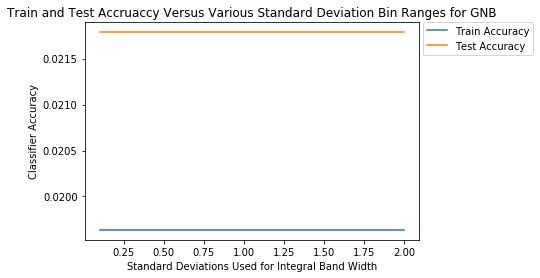

In [275]:
import matplotlib.pyplot as plt
%matplotlib inline
train_accs = []
test_accs = []
range_stds = np.linspace(0.1, 2, num=21)
for range_std in range_stds:    
    y_hat_train = [predict_class(X_train.iloc[idx], range_width_std=range_std) for idx in range(len(X_train))]
    y_hat_test = [predict_class(X_test.iloc[idx], range_width_std=range_std) for idx in range(len(X_test))]
    
    residuals_train = y_hat_train == y_train
    acc_train = residuals_train.sum()/len(residuals_train)

    residuals_test = y_hat_test == y_test
    acc_test = residuals_test.sum()/len(residuals_test)
    
    train_accs.append(acc_train)
    test_accs.append(acc_test)
plt.plot(range_stds, train_accs, label='Train Accuracy')
plt.plot(range_stds, test_accs, label='Test Accuracy')
plt.title('Train and Test Accruaccy Versus Various Standard Deviation Bin Ranges for GNB')
plt.ylabel('Classifier Accuracy')
plt.xlabel('Standard Deviations Used for Integral Band Width')
plt.legend(loc=(1.01,.85))

In [276]:
temp = df[df["Moody's Rating"] == 1]['Coupon']
aggs = temp.agg(['mean', 'std'])
aggs

mean    3.066303
std     0.799545
Name: Coupon, dtype: float64

In [277]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
import scipy.stats as stats
sns.set_style('white')

Probability of ###### withing Range for the Given Class: 0.0


Text(0.5, 0, '#####')

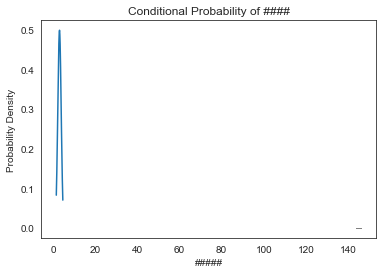

In [278]:
x = np.linspace(temp.min(), temp.max(), num=10**3)
pdf = stats.norm.pdf(x, loc=aggs['mean'], scale=aggs['std'])
xi = 145
width = 2
xi_lower = xi - width/2
xi_upper = xi + width/2

fig, ax = plt.subplots()

plt.plot(x, pdf)

# Make the shaded region
ix = np.linspace(xi_lower, xi_upper)
iy = stats.norm.pdf(ix, loc=aggs['mean'], scale=aggs['std'])
verts = [(xi_lower, 0), *zip(ix, iy), (xi_upper, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly);

plt.plot((145, 145), (0, stats.norm.pdf(145, loc=aggs['mean'], scale=aggs['std'])), linestyle='dotted')
p_area = stats.norm.cdf(xi_upper, loc=aggs['mean'], scale=aggs['std']) - stats.norm.cdf(xi_lower, loc=aggs['mean'], scale=aggs['std'])
print('Probability of ###### withing Range for the Given Class: {}'.format(p_area))
plt.title('Conditional Probability of ####')
plt.ylabel('Probability Density')
plt.xlabel('#####')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 13  10  10   2  38  49  74 108  71  35   7   5   1  36]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


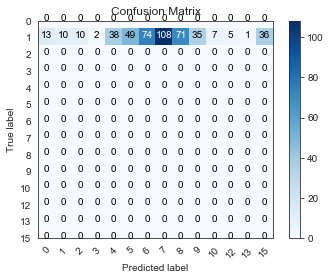

In [279]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix



cnf_matrix = confusion_matrix(y_hat_test, y_test)

print(cnf_matrix)

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

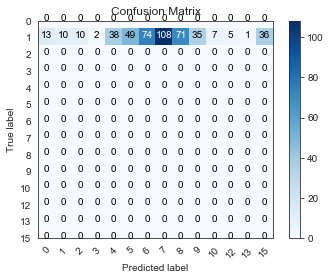

In [280]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [281]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Pseudocode/Outline:
    # Print the confusion matrix (optional)
    # Create the basic matrix
    # Add title and axis labels
    # Add appropriate axis scales
    # Add labels to each cell
    # Add a legend
    
    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

In [282]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Normalized confusion matrix
[[       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan]
 [0.02832244 0.02178649 0.02178649 0.0043573  0.08278867 0.10675381
  0.16122004 0.23529412 0.1546841  0.07625272 0.01525054 0.01089325
  0.00217865 0.07843137]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan]
 [    

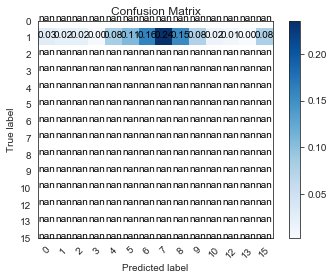

In [283]:
# Plot a normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [284]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(y_hat_train, y_train)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(y_hat_train)
dummy_clf.score(y_hat_train, y_train)

0.23054545454545455

In [285]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(y_hat_test, y_test)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(y_test)
dummy_clf.score(y_hat_test, y_test)

0.23529411764705882

In [286]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
# X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["default", "payoff"])

visualizer.fit(y_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

YellowbrickValueError: discovered 14 classes in the data, does not match the 2 labels specified.

In [287]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 917 points : 697


In [ ]:
confusion matrix

In [ ]:
cross validate

In [ ]:
check balance

In [ ]:
gridsearch?